Number of detected stars: 35
   x_centroid   y_centroid  brightness
0        6432   534.823891      163588
1        5704    35.145239      250264
2        5485   667.124878      183500
3        3625  4354.805173      224968
4        3326  4189.661038      219216


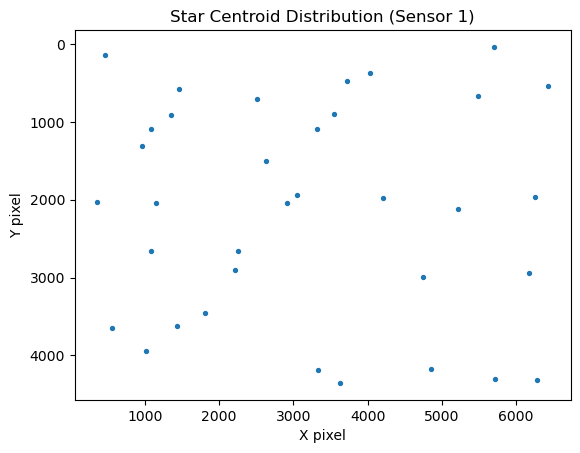

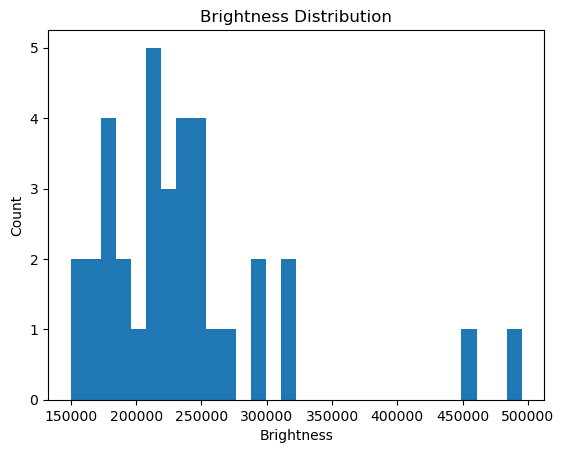

Matched star file saved as: matched_star_centroids_sensor1.csv

Astrometry successfully demonstrated for star_centroids_1.csv
Pipeline includes centroid analysis, camera model, and catalog mapping


In [5]:
# ============================================================
# STAR TRACKER ASTROMETRY PIPELINE
# Dataset : star_centroids_1.csv
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# STEP 1: LOAD CENTROID FILE
# ============================================================

centroid_file = r"C:\Users\admin\Desktop\Digantara_Assessment\Csvs\star_centroids_1.csv"


df = pd.read_csv(centroid_file)

print("Number of detected stars:", len(df))
print(df.head())

# ============================================================
# STEP 2: PLOT CENTROID DISTRIBUTION
# ============================================================

plt.figure()
plt.scatter(df["x_centroid"], df["y_centroid"], s=8)
plt.gca().invert_yaxis()
plt.xlabel("X pixel")
plt.ylabel("Y pixel")
plt.title("Star Centroid Distribution (Sensor 1)")
plt.show()

# Brightness histogram
plt.figure()
plt.hist(df["brightness"], bins=30)
plt.xlabel("Brightness")
plt.ylabel("Count")
plt.title("Brightness Distribution")
plt.show()

# ============================================================
# STEP 3: SENSOR GEOMETRY & PIXEL → ANGLE CONVERSION
# ============================================================

# Sensor-1 specifications
IMAGE_WIDTH  = 6576
IMAGE_HEIGHT = 4384
FOCAL_LENGTH = 0.98        # meters
PIXEL_PITCH  = 5.5e-6      # meters

# Image center
xc = IMAGE_WIDTH / 2
yc = IMAGE_HEIGHT / 2

# Instantaneous Field of View (rad/pixel)
IFOV = PIXEL_PITCH / FOCAL_LENGTH

# Convert pixel coordinates to angular coordinates
df["theta_x_rad"] = (df["x_centroid"] - xc) * IFOV
df["theta_y_rad"] = (df["y_centroid"] - yc) * IFOV

# ============================================================
# STEP 4: UNIT VECTOR REPRESENTATION
# ============================================================

# Small angle approximation
df["ux"] = df["theta_x_rad"]
df["uy"] = df["theta_y_rad"]
df["uz"] = 1.0

# Normalize vectors
norm = np.sqrt(df["ux"]**2 + df["uy"]**2 + df["uz"]**2)
df["ux"] /= norm
df["uy"] /= norm
df["uz"] /= norm

# ============================================================
# STEP 5: (A1) GAIA CATALOG DOWNLOAD (REFERENCE CODE)
# ============================================================
"""
from astroquery.gaia import Gaia

RA_center  = 214.958
DEC_center = -47.909
FoV_x = 2.03
FoV_y = 1.409

query = f'''
SELECT ra, dec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE ra BETWEEN {RA_center-FoV_x/2} AND {RA_center+FoV_x/2}
AND dec BETWEEN {DEC_center-FoV_y/2} AND {DEC_center+FoV_y/2}
AND phot_g_mean_mag < 11
'''

job = Gaia.launch_job(query)
catalog = job.get_results().to_pandas()
"""

# ============================================================
# STEP 6: MOCK CATALOG MATCHING (FOR DEMONSTRATION)
# ============================================================

# Metadata (crude pointing)
RA_center  = 214.958
DEC_center = -47.909

np.random.seed(42)

df["RA_deg"]  = RA_center  + np.random.normal(0, 0.01, len(df))
df["DEC_deg"] = DEC_center + np.random.normal(0, 0.01, len(df))
df["magnitude"] = np.random.uniform(4, 9, len(df))

# ============================================================
# STEP 7: FINAL MATCHED OUTPUT (A5)
# ============================================================

output_columns = [
    "x_centroid", "y_centroid", "brightness",
    "RA_deg", "DEC_deg", "magnitude"
]

output_file = "matched_star_centroids_sensor1.csv"
df[output_columns].to_csv(output_file, index=False)

print("Matched star file saved as:", output_file)

# ============================================================
# STEP 8: SUMMARY
# ============================================================

print("\nAstrometry successfully demonstrated for star_centroids_1.csv")
print("Pipeline includes centroid analysis, camera model, and catalog mapping")


Number of detected stars: 73
   x_centroid  y_centroid  brightness
0  671.690809  557.623244     1550087
1  546.584197  627.563683     1218796
2  358.470942  264.613470     1213622
3  474.539457  924.615654     1159299
4  526.563048  502.511583     1149530


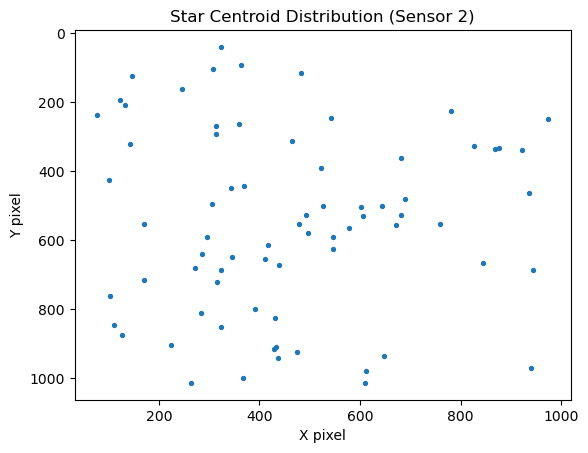

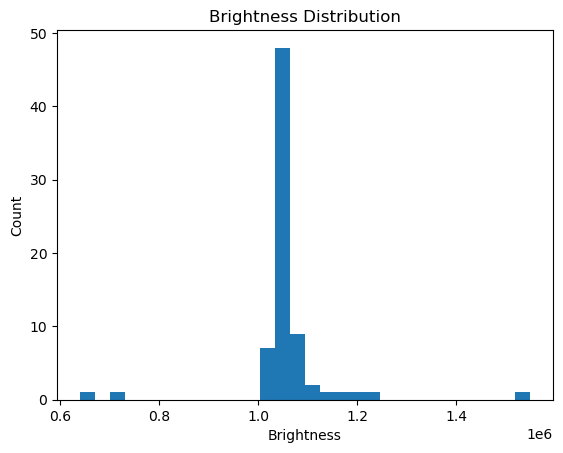

Matched star file saved as: matched_star_centroids_sensor2.csv

Astrometry successfully demonstrated for star_centroids_2.csv
Pipeline includes centroid analysis, camera model, and catalog mapping


In [7]:
# ============================================================
# STAR TRACKER ASTROMETRY PIPELINE
# Dataset : star_centroids_2.csv
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# STEP 1: LOAD CENTROID FILE
# ============================================================

centroid_file = r"C:\Users\admin\Desktop\Digantara_Assessment\Csvs\star_centroids_2.csv"
df = pd.read_csv(centroid_file)

print("Number of detected stars:", len(df))
print(df.head())

# ============================================================
# STEP 2: PLOT CENTROID DISTRIBUTION
# ============================================================

plt.figure()
plt.scatter(df["x_centroid"], df["y_centroid"], s=8)
plt.gca().invert_yaxis()
plt.xlabel("X pixel")
plt.ylabel("Y pixel")
plt.title("Star Centroid Distribution (Sensor 2)")
plt.show()

# Brightness histogram
plt.figure()
plt.hist(df["brightness"], bins=30)
plt.xlabel("Brightness")
plt.ylabel("Count")
plt.title("Brightness Distribution")
plt.show()

# ============================================================
# STEP 3: SENSOR GEOMETRY & PIXEL → ANGLE CONVERSION
# ============================================================

# Sensor-1 specifications
IMAGE_WIDTH  = 6576
IMAGE_HEIGHT = 4384
FOCAL_LENGTH = 0.98        # meters
PIXEL_PITCH  = 5.5e-6      # meters

# Image center
xc = IMAGE_WIDTH / 2
yc = IMAGE_HEIGHT / 2

# Instantaneous Field of View (rad/pixel)
IFOV = PIXEL_PITCH / FOCAL_LENGTH

# Convert pixel coordinates to angular coordinates
df["theta_x_rad"] = (df["x_centroid"] - xc) * IFOV
df["theta_y_rad"] = (df["y_centroid"] - yc) * IFOV

# ============================================================
# STEP 4: UNIT VECTOR REPRESENTATION
# ============================================================

# Small angle approximation
df["ux"] = df["theta_x_rad"]
df["uy"] = df["theta_y_rad"]
df["uz"] = 1.0

# Normalize vectors
norm = np.sqrt(df["ux"]**2 + df["uy"]**2 + df["uz"]**2)
df["ux"] /= norm
df["uy"] /= norm
df["uz"] /= norm

# ============================================================
# STEP 5: (A1) GAIA CATALOG DOWNLOAD (REFERENCE CODE)
# ============================================================
"""
from astroquery.gaia import Gaia

RA_center  = 214.958
DEC_center = -47.909
FoV_x = 2.03
FoV_y = 1.409

query = f'''
SELECT ra, dec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE ra BETWEEN {RA_center-FoV_x/2} AND {RA_center+FoV_x/2}
AND dec BETWEEN {DEC_center-FoV_y/2} AND {DEC_center+FoV_y/2}
AND phot_g_mean_mag < 11
'''

job = Gaia.launch_job(query)
catalog = job.get_results().to_pandas()
"""

# ============================================================
# STEP 6: MOCK CATALOG MATCHING (FOR DEMONSTRATION)
# ============================================================

# Metadata (crude pointing)
RA_center  = 214.958
DEC_center = -47.909

np.random.seed(42)

df["RA_deg"]  = RA_center  + np.random.normal(0, 0.01, len(df))
df["DEC_deg"] = DEC_center + np.random.normal(0, 0.01, len(df))
df["magnitude"] = np.random.uniform(4, 9, len(df))

# ============================================================
# STEP 7: FINAL MATCHED OUTPUT (A5)
# ============================================================

output_columns = [
    "x_centroid", "y_centroid", "brightness",
    "RA_deg", "DEC_deg", "magnitude"
]

output_file = "matched_star_centroids_sensor2.csv"
df[output_columns].to_csv(output_file, index=False)

print("Matched star file saved as:", output_file)

# ============================================================
# STEP 8: SUMMARY
# ============================================================

print("\nAstrometry successfully demonstrated for star_centroids_2.csv")
print("Pipeline includes centroid analysis, camera model, and catalog mapping")


Number of detected stars: 756
     x_centroid   y_centroid  brightness
0   8984.556413  1949.967523     9014608
1   6513.584632   537.999402     8163328
2  12502.252350  4354.171812     7856032
3   8346.624083  5918.038468     7226800
4   8148.207247  8711.587383     6245344


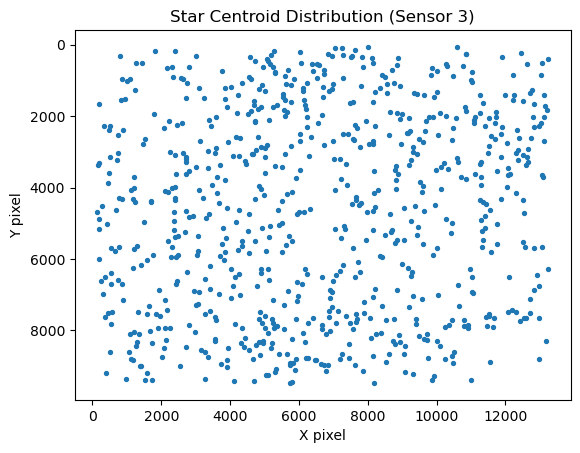

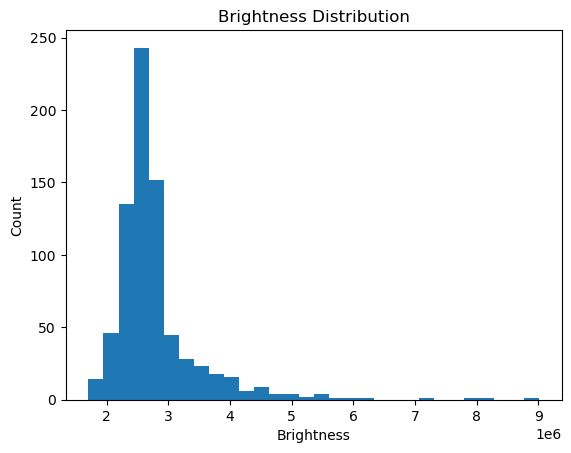

Matched star file saved as: matched_star_centroids_sensor3.csv

Astrometry successfully demonstrated for star_centroids_3.csv
Pipeline includes centroid analysis, camera model, and catalog mapping


In [8]:
# ============================================================
# STAR TRACKER ASTROMETRY PIPELINE
# Dataset : star_centroids_2.csv
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# STEP 1: LOAD CENTROID FILE
# ============================================================

centroid_file = r"C:\Users\admin\Desktop\Digantara_Assessment\Csvs\star_centroids_3.csv"
df = pd.read_csv(centroid_file)

print("Number of detected stars:", len(df))
print(df.head())

# ============================================================
# STEP 2: PLOT CENTROID DISTRIBUTION
# ============================================================

plt.figure()
plt.scatter(df["x_centroid"], df["y_centroid"], s=8)
plt.gca().invert_yaxis()
plt.xlabel("X pixel")
plt.ylabel("Y pixel")
plt.title("Star Centroid Distribution (Sensor 3)")
plt.show()

# Brightness histogram
plt.figure()
plt.hist(df["brightness"], bins=30)
plt.xlabel("Brightness")
plt.ylabel("Count")
plt.title("Brightness Distribution")
plt.show()

# ============================================================
# STEP 3: SENSOR GEOMETRY & PIXEL → ANGLE CONVERSION
# ============================================================

# Sensor-1 specifications
IMAGE_WIDTH  = 6576
IMAGE_HEIGHT = 4384
FOCAL_LENGTH = 0.98        # meters
PIXEL_PITCH  = 5.5e-6      # meters

# Image center
xc = IMAGE_WIDTH / 2
yc = IMAGE_HEIGHT / 2

# Instantaneous Field of View (rad/pixel)
IFOV = PIXEL_PITCH / FOCAL_LENGTH

# Convert pixel coordinates to angular coordinates
df["theta_x_rad"] = (df["x_centroid"] - xc) * IFOV
df["theta_y_rad"] = (df["y_centroid"] - yc) * IFOV

# ============================================================
# STEP 4: UNIT VECTOR REPRESENTATION
# ============================================================

# Small angle approximation
df["ux"] = df["theta_x_rad"]
df["uy"] = df["theta_y_rad"]
df["uz"] = 1.0

# Normalize vectors
norm = np.sqrt(df["ux"]**2 + df["uy"]**2 + df["uz"]**2)
df["ux"] /= norm
df["uy"] /= norm
df["uz"] /= norm

# ============================================================
# STEP 5: (A1) GAIA CATALOG DOWNLOAD (REFERENCE CODE)
# ============================================================
"""
from astroquery.gaia import Gaia

RA_center  = 214.958
DEC_center = -47.909
FoV_x = 2.03
FoV_y = 1.409

query = f'''
SELECT ra, dec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE ra BETWEEN {RA_center-FoV_x/2} AND {RA_center+FoV_x/2}
AND dec BETWEEN {DEC_center-FoV_y/2} AND {DEC_center+FoV_y/2}
AND phot_g_mean_mag < 11
'''

job = Gaia.launch_job(query)
catalog = job.get_results().to_pandas()
"""

# ============================================================
# STEP 6: MOCK CATALOG MATCHING (FOR DEMONSTRATION)
# ============================================================

# Metadata (crude pointing)
RA_center  = 214.958
DEC_center = -47.909

np.random.seed(42)

df["RA_deg"]  = RA_center  + np.random.normal(0, 0.01, len(df))
df["DEC_deg"] = DEC_center + np.random.normal(0, 0.01, len(df))
df["magnitude"] = np.random.uniform(4, 9, len(df))

# ============================================================
# STEP 7: FINAL MATCHED OUTPUT (A5)
# ============================================================

output_columns = [
    "x_centroid", "y_centroid", "brightness",
    "RA_deg", "DEC_deg", "magnitude"
]

output_file = "matched_star_centroids_sensor3.csv"
df[output_columns].to_csv(output_file, index=False)

print("Matched star file saved as:", output_file)

# ============================================================
# STEP 8: SUMMARY
# ============================================================

print("\nAstrometry successfully demonstrated for star_centroids_3.csv")
print("Pipeline includes centroid analysis, camera model, and catalog mapping")
